In [1]:
!pip install ipywidgets
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 kB 2.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 4.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import urllib.request
import geopandas as gpd
import ipywidgets as widgets
import plotly.graph_objects as go
from ipywidgets import widgets, VBox, HBox, Output
from IPython.display import display

In [3]:
#  Load datasets
bleaching_df = pd.read_csv("/work/Coral/coral_bleaching.csv")
recovery_df = pd.read_csv("/work/Coral/coral_recovery.csv")

# Standardize column names
bleaching_df.columns = bleaching_df.columns.str.strip().str.lower().str.replace(" ", "_")
recovery_df.columns  = recovery_df.columns.str.strip().str.lower().str.replace(" ", "_")

/tmp/ipykernel_71/2562719676.py:2: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  bleaching_df = pd.read_csv("/work/Coral/coral_bleaching.csv")
/tmp/ipykernel_71/2562719676.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  recovery_df = pd.read_csv("/work/Coral/coral_recovery.csv")


In [4]:
bleaching_df = bleaching_df.drop_duplicates()
recovery_df = recovery_df.drop_duplicates()

print(bleaching_df.shape)
print(recovery_df.shape)

(41361, 62)
(29208, 75)


In [5]:
bleaching_df = bleaching_df.dropna(axis=1, how='all')
recovery_df = recovery_df.dropna(axis=1, how='all')

print(bleaching_df.shape)
print(recovery_df.shape)

(41361, 62)
(29208, 75)


In [6]:
bleaching_df.head()

site_id  sample_id data_source  latitude_degrees  longitude_degrees  \
0     2501   10324336      Donner            23.163           -82.5260   
1     3467   10324754      Donner           -17.575          -149.7833   
2     1794   10323866      Donner            18.369           -64.5640   
3     8647   10328028      Donner            17.760           -64.5680   
4     8648   10328029      Donner            17.769           -64.5830   

  ocean_name reef_id            realm_name  \
0   Atlantic      nd     Tropical Atlantic   
1    Pacific      nd  Eastern Indo-Pacific   
2   Atlantic      nd     Tropical Atlantic   
3   Atlantic      nd     Tropical Atlantic   
4   Atlantic      nd     Tropical Atlantic   

                               ecoregion_name      country_name  ...  \
0                     Cuba and Cayman Islands              Cuba  ...   
1            Society Islands French Polynesia  French Polynesia  ...   
2  Hispaniola Puerto Rico and Lesser Antilles    United Kingdom  ...   
3  Hispaniola Puerto Rico and Lesser Antilles     United States  ...   
4  Hispaniola Puerto Rico and Lesser Antilles     United States  ...   

  tsa_frequencymax tsa_frequencymean tsa_dhw tsa_dhw_standard_deviation  \
0                5                 0       0                       0.74   
1                4                 0    0.26                       0.67   
2                7                 0       0                       1.04   
3                4                 0       0                       0.75   
4                5                 0       0                       0.92   

  tsa_dhwmax tsa_dhwmean        date  \
0       7.25        0.18  2005-09-15   
1       4.65        0.19  1991-03-15   
2      11.66        0.26  2006-01-15   
3       5.64         0.2  2006-04-15   
4       6.89        0.25  2006-04-15   

                                       site_comments  \
0                                                 nd   
1  The bleaching does not  appear to have gained ...   
2                                                 nd   
3                                                 nd   
4                                                 nd   

                                     sample_comments  bleaching_comments  
0                                                 nd                  nd  
1  The bleaching does not  appear to have gained ...                  nd  
2                                                 nd                  nd  
3                                                 nd                  nd  
4                                                 nd                  nd  

[5 rows x 62 columns]

In [7]:
bleaching_df = bleaching_df.loc[:, bleaching_df.nunique(dropna=False) > 1]
recovery_df = recovery_df.loc[:, recovery_df.nunique(dropna=False) > 1]

print(bleaching_df.shape)
print(recovery_df.shape)

(41361, 62)
(29208, 75)


In [8]:
cols_all_nd = bleaching_df.columns[(bleaching_df == 'nd').all()]
bleaching_df = bleaching_df.drop(columns=cols_all_nd)

cols_all_nd = recovery_df.columns[(recovery_df == 'nd').all()]
recovery_df = recovery_df.drop(columns=cols_all_nd)

print(bleaching_df.shape)
print(recovery_df.shape)

(41361, 62)
(29208, 75)


In [9]:
bleaching_df = bleaching_df[bleaching_df['percent_bleaching'] != 'nd']
recovery_df = recovery_df[recovery_df['percent_hard_coral_cover'] != 'nd']

print(bleaching_df.shape)
print(recovery_df.shape)

(34515, 62)
(29208, 75)


In [10]:
def drop_low_info_columns(df):
    threshold = 0.5  # 50%
    cols_to_drop = []
    n = len(df)

    for col in df.columns:
        # Count nulls
        null_count = df[col].isnull().sum()

        # Count 'nd' strings (case insensitive)
        nd_count = df[col].astype(str).str.lower().eq('nd').sum()

        # Count zeros (only if numeric or convertible)
        try:
            numeric_col = pd.to_numeric(df[col], errors='coerce')
            zero_count = (numeric_col == 0).sum()
        except:
            zero_count = 0

        total_bad = null_count + nd_count + zero_count

        if total_bad / n > threshold:
            cols_to_drop.append(col)

    print(f"Dropping columns due to >50% null/'nd'/0 values: {cols_to_drop}")
    return df.drop(columns=cols_to_drop)

# Clean the dataframes
bleaching_df = drop_low_info_columns(bleaching_df)
recovery_df = drop_low_info_columns(recovery_df)

print(bleaching_df.shape)
print(recovery_df.shape)

Dropping columns due to >50% null/'nd'/0 values: ['site_name', 'ssta_mean', 'tsa_dhw', 'site_comments', 'sample_comments', 'bleaching_comments']
Dropping columns due to >50% null/'nd'/0 values: ['ecoregion_distance', 'habitat_distance', 'site_comments', 'cover_comments', 'no_take_area', 'mpa_distance', 'ssta_mean', 'tsa_dhw']
(34515, 56)
(29208, 67)


In [11]:
print(bleaching_df.columns)
print(recovery_df.columns)

Index(['site_id', 'sample_id', 'data_source', 'latitude_degrees',
       'longitude_degrees', 'ocean_name', 'reef_id', 'realm_name',
       'ecoregion_name', 'country_name', 'state_island_province_name',
       'city_town_name', 'distance_to_shore', 'exposure', 'turbidity',
       'cyclone_frequency', 'date_day', 'date_month', 'date_year', 'depth_m',
       'substrate_name', 'percent_cover', 'bleaching_level',
       'percent_bleaching', 'climsst', 'temperature_kelvin',
       'temperature_mean', 'temperature_minimum', 'temperature_maximum',
       'temperature_kelvin_standard_deviation', 'windspeed', 'ssta',
       'ssta_standard_deviation', 'ssta_minimum', 'ssta_maximum',
       'ssta_frequency', 'ssta_frequency_standard_deviation',
       'ssta_frequencymax', 'ssta_frequencymean', 'ssta_dhw',
       'ssta_dhw_standard_deviation', 'ssta_dhwmax', 'ssta_dhwmean', 'tsa',
       'tsa_standard_deviation', 'tsa_minimum', 'tsa_maximum', 'tsa_mean',
       'tsa_frequency', 'tsa_frequency_sta

In [12]:
# First, convert year to int if not already
bleaching_df['date_year'] = bleaching_df['date_year'].astype(int)

# Filter out records before 2000
bleaching_df = bleaching_df[bleaching_df['date_year'] >= 2000]

# Find countries with at least 10 unique years of data
valid_countries = (
    bleaching_df.groupby('country_name')['date_year']
    .nunique()
    .loc[lambda x: x >= 10]
    .index
)

# Keep only records for those countries
bleaching_df = bleaching_df[bleaching_df['country_name'].isin(valid_countries)]


In [13]:
# The error suggests that the 'percent_bleaching' column is not in a numeric format.
# We need to convert it to a numeric type before performing the mean aggregation.

# Convert 'percent_bleaching' to numeric, forcing errors to NaN
bleaching_df['percent_bleaching'] = pd.to_numeric(bleaching_df['percent_bleaching'], errors='coerce')

# Re-run the plotting code
countries = sorted(bleaching_df['country_name'].dropna().unique())

# Prepare traces for each country
fig = go.Figure()

for country in countries:
    df_country = bleaching_df[bleaching_df['country_name'] == country]
    df_grouped = df_country.groupby('date_year')['percent_bleaching'].mean().reset_index().sort_values('date_year')
    fig.add_trace(go.Scatter(
        x=df_grouped['date_year'],
        y=df_grouped['percent_bleaching'],
        mode='lines+markers',
        name=country,
        visible=False  # initially hidden
    ))

# Make first country visible by default
fig.data[0].visible = True

# Create dropdown buttons
buttons = []
for i, country in enumerate(countries):
    visible = [False] * len(countries)
    visible[i] = True
    buttons.append(dict(
        label=country,
        method='update',
        args=[{'visible': visible},
              {'title': f'Average Coral Bleaching Trend in {country}'}]
    ))

fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=0.1,
        y=1.15,
        xanchor='left',
        yanchor='top'
    )],
    title=f"Average Coral Bleaching Trend in {countries[0]}",
    xaxis_title='Year',
    yaxis_title='Bleaching (%)',
    xaxis=dict(dtick=1)
)

fig.show()

In [14]:
duplicates = bleaching_df.groupby(['country_name', 'date_year']).filter(lambda x: len(x) > 1)

print(duplicates)


       site_id  sample_id data_source  latitude_degrees  longitude_degrees  \
2         1794   10323866      Donner           18.3690           -64.5640   
3         8647   10328028      Donner           17.7600           -64.5680   
4         8648   10328029      Donner           17.7690           -64.5830   
6         9298   10328657      Donner           17.8110           -64.6300   
8         9160   10328498      Donner           25.4250           -80.1610   
...        ...        ...         ...               ...                ...   
35040     9436   10318964  Reef_Check           18.3350           -64.8486   
35041     9436   10318964  Reef_Check           18.3350           -64.8486   
35042     9835   10290574  McClanahan          -13.5002            47.8825   
35043    12228   10274702        FRRP           24.5019           -81.6328   
35044    13057   10275554        FRRP           24.9542           -80.5458   

      ocean_name              reef_id            realm_name  \


In [15]:
bleaching_df[(bleaching_df['country_name']=='United States') & (bleaching_df['date_year']== 2006)]

site_id  sample_id data_source  latitude_degrees  longitude_degrees  \
3         8647   10328028      Donner           17.7600           -64.5680   
4         8648   10328029      Donner           17.7690           -64.5830   
10        8649   10328030      Donner           17.7930           -64.6280   
13        8650   10328033      Donner           17.7840           -64.6090   
51        8651   10328034      Donner           17.7970           -64.6120   
...        ...        ...         ...               ...                ...   
34528     9439   10318959  Reef_Check           18.3661           -64.8081   
34830     9432   10318963  Reef_Check           18.3031           -64.8388   
34831     9432   10318963  Reef_Check           18.3031           -64.8388   
34989     9430   10318991  Reef_Check           18.2785           -64.8983   
34990     9430   10318991  Reef_Check           18.2785           -64.8983   

      ocean_name                    reef_id         realm_name  \
3       Atlantic                         nd  Tropical Atlantic   
4       Atlantic                         nd  Tropical Atlantic   
10      Atlantic                         nd  Tropical Atlantic   
13      Atlantic                         nd  Tropical Atlantic   
51      Atlantic                         nd  Tropical Atlantic   
...          ...                        ...                ...   
34528   Atlantic        64.48.29W.18.21.58N  Tropical Atlantic   
34830   Atlantic  64.50.19.72W.18.18.11.15N  Tropical Atlantic   
34831   Atlantic  64.50.19.72W.18.18.11.15N  Tropical Atlantic   
34989   Atlantic        64.53.90W.18.16.71N  Tropical Atlantic   
34990   Atlantic        64.53.90W.18.16.71N  Tropical Atlantic   

                                   ecoregion_name   country_name  ...  \
3      Hispaniola Puerto Rico and Lesser Antilles  United States  ...   
4      Hispaniola Puerto Rico and Lesser Antilles  United States  ...   
10     Hispaniola Puerto Rico and Lesser Antilles  United States  ...   
13     Hispaniola Puerto Rico and Lesser Antilles  United States  ...   
51     Hispaniola Puerto Rico and Lesser Antilles  United States  ...   
...                                           ...            ...  ...   
34528  Hispaniola Puerto Rico and Lesser Antilles  United States  ...   
34830  Hispaniola Puerto Rico and Lesser Antilles  United States  ...   
34831  Hispaniola Puerto Rico and Lesser Antilles  United States  ...   
34989  Hispaniola Puerto Rico and Lesser Antilles  United States  ...   
34990  Hispaniola Puerto Rico and Lesser Antilles  United States  ...   

      tsa_maximum tsa_mean tsa_frequency tsa_frequency_standard_deviation  \
3            2.19    -1.49             3                             0.94   
4            1.87     -1.5             3                             1.33   
10           1.99    -1.48             6                             1.24   
13           1.87     -1.5             3                             1.33   
51           2.16    -1.49             2                             1.05   
...           ...      ...           ...                              ...   
34528        1.69    -1.54             6                             1.22   
34830        2.16    -1.52             4                             1.12   
34831        2.16    -1.52             4                             1.12   
34989        2.47    -1.48             7                              1.3   
34990        2.47    -1.48             7                              1.3   

      tsa_frequencymax  tsa_frequencymean  tsa_dhw_standard_deviation  \
3                    4                  0                        0.75   
4                    5                  0                        0.92   
10                   6                  0                        0.77   
13                   5                  0                        0.92   
51                   5                  0                        0.72   
...                ...               

In [16]:
# Prepare bleaching_df
bleaching_filtered = bleaching_df[
    (bleaching_df['date_year'].notnull()) & (bleaching_df['date_year'] >= 2000)
].copy()
bleaching_filtered['date_year'] = bleaching_filtered['date_year'].astype(int)
bleaching_filtered['source'] = 'Bleaching'

# Prepare recovery_df
recovery_filtered = recovery_df[
    (recovery_df['date_year'].notnull()) & (recovery_df['date_year'] >= 2000)
].copy()
recovery_filtered['date_year'] = recovery_filtered['date_year'].astype(int)
recovery_filtered['source'] = 'Recovery'

# Combine and drop missing lat/lon
combined_df = pd.concat([
    bleaching_filtered[['latitude_degrees', 'longitude_degrees', 'date_year', 'source']],
    recovery_filtered[['latitude_degrees', 'longitude_degrees', 'date_year', 'source']]
], ignore_index=True).dropna(subset=['latitude_degrees', 'longitude_degrees'])

# Sort by date_year ascending
combined_df = combined_df.sort_values(by='date_year')

fig = px.scatter_mapbox(
    combined_df,
    lat='latitude_degrees',
    lon='longitude_degrees',
    color='source',
    hover_data={'date_year': True},
    color_discrete_map={
        'Bleaching': 'red',
        'Recovery': 'green'
    },
    animation_frame='date_year',    # year slider
    height=600,
    title='World Map: Coral Bleaching and Recovery Sites (Year ≥ 2000)'
)

fig.update_layout(
    mapbox_style='open-street-map',
    mapbox=dict(
        center=dict(lat=0, lon=0),
        zoom=0.7
    ),
    legend_title_text='Dataset',
    margin={"r":0,"t":30,"l":0,"b":0},
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': True},
                                'fromcurrent': True}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False},
                                  'mode': 'immediate',
                                  'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 70},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

fig.show()


/tmp/ipykernel_71/3561776958.py:24: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [17]:
# Prepare bleaching data with intensity (e.g., percent_bleaching)
bleaching_filtered = bleaching_df[
    (bleaching_df['date_year'].notnull()) & (bleaching_df['date_year'] >= 2000) & (bleaching_df['date_year'].notnull()) & (bleaching_df['date_year'] <= 2019) &
    (bleaching_df['latitude_degrees'].notnull()) & (bleaching_df['longitude_degrees'].notnull() & (bleaching_df['country_name'].notnull()))
].copy()
bleaching_filtered['date_year'] = bleaching_filtered['date_year'].astype(int)

# Make sure intensity column exists and clean
bleaching_filtered = bleaching_filtered[bleaching_filtered['percent_bleaching'].notnull()]

# Sort by date_year ascending
bleaching_filtered = bleaching_filtered.sort_values(by='date_year')

fig_bleaching = px.density_mapbox(
    bleaching_filtered,
    lat='latitude_degrees',
    lon='longitude_degrees',
    z='percent_bleaching',             # intensity weight
    radius=20,
    animation_frame='date_year',
    color_continuous_scale='YlOrRd',
    range_color=[0, bleaching_filtered['percent_bleaching'].max()],
    mapbox_style='open-street-map',
    center=dict(lat=0, lon=0),
    zoom=0.4,
    height=700,
    title='Coral Bleaching Intensity Heatmap',
    hover_name='country_name',               # show country name in tooltip header
    hover_data={'percent_bleaching': True, 'date_year': True} 
)

fig_bleaching.update_layout(coloraxis_colorbar=dict(title="Percent Bleaching"))

fig_bleaching.show()


/tmp/ipykernel_71/1959985201.py:14: DeprecationWarning:

*density_mapbox* is deprecated! Use *density_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [18]:
recovery_filtered =  recovery_df[
    (recovery_df['date_year'].notnull()) & (recovery_df['date_year'] >= 2000) & (recovery_df['date_year'] <= 2019) &
    (recovery_df['latitude_degrees'].notnull()) & (recovery_df['longitude_degrees'].notnull()) & (recovery_df['country_name'].notnull())
].copy()
recovery_filtered['date_year'] = recovery_filtered['date_year'].astype(int)

# Make sure intensity column exists and clean
recovery_filtered = recovery_filtered[recovery_filtered['percent_hard_coral_cover'].notnull()]
recovery_filtered = recovery_filtered.sort_values(by='date_year')

fig_recovery = px.density_mapbox(
    recovery_filtered,
    lat='latitude_degrees',
    lon='longitude_degrees',
    z='percent_hard_coral_cover',     # intensity weight
    radius=20,
    animation_frame='date_year',
    color_continuous_scale='Greens',
    range_color=[0, recovery_filtered['percent_hard_coral_cover'].max()],
    mapbox_style='open-street-map',
    center=dict(lat=0, lon=0),
    zoom=0.4,
    height=700,
    title='Coral Recovery Intensity Heatmap',
    hover_name='country_name',               # show country name in tooltip header
    hover_data={'percent_hard_coral_cover': True, 'date_year': True} 
)

fig_recovery.update_layout(coloraxis_colorbar=dict(title="Percent Hard Coral Cover"))

fig_recovery.show()


/tmp/ipykernel_71/2662077774.py:11: DeprecationWarning:

*density_mapbox* is deprecated! Use *density_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [19]:
import pandas as pd
import plotly.graph_objects as go

# List of environmental conditions to compare
conditions = ['temperature_mean', 'windspeed', 'turbidity', 'climsst']

# Filter bleaching data for US and year 2019, cleaning nulls
bleaching_us = bleaching_df[
    (bleaching_df['country_name'] == 'United States') &
    (bleaching_df['date_year'] == 2019) &
    (bleaching_df['percent_bleaching'].notnull())
].copy()

# Filter recovery data for US and year 2019, cleaning nulls
recovery_us = recovery_df[
    (recovery_df['country_name'] == 'United States') &
    (recovery_df['date_year'] == 2019) &
    (recovery_df['percent_hard_coral_cover'].notnull())
].copy()

# Ensure environmental columns exist, fill missing with None
for col in conditions:
    if col not in bleaching_us.columns:
        bleaching_us[col] = None
    if col not in recovery_us.columns:
        recovery_us[col] = None

# Function to group by condition and get mean percent values
def prepare_trend_data(df, y_col, x_col):
    df2 = df[[x_col, y_col]].dropna()
    return df2.groupby(x_col)[y_col].mean().reset_index()

# Create traces and dropdown buttons for each condition
traces = []
buttons = []

for i, cond in enumerate(conditions):
    # Bleaching line trace (red)
    bleach_trend = prepare_trend_data(bleaching_us, 'percent_bleaching', cond)
    trace_bleach = go.Scatter(
        x=bleach_trend[cond],
        y=bleach_trend['percent_bleaching'],
        mode='lines+markers',
        name='Bleaching %',
        line=dict(color='red'),
        visible=(i == 0)
    )
    
    # Recovery line trace (green)
    recovery_trend = prepare_trend_data(recovery_us, 'percent_hard_coral_cover', cond)
    trace_recovery = go.Scatter(
        x=recovery_trend[cond],
        y=recovery_trend['percent_hard_coral_cover'],
        mode='lines+markers',
        name='Recovery %',
        line=dict(color='green'),
        visible=(i == 0)
    )
    
    traces.extend([trace_bleach, trace_recovery])
    
    # Visibility array for dropdown buttons
    visibility = [False] * len(conditions) * 2
    visibility[2*i] = True
    visibility[2*i + 1] = True
    
    buttons.append(dict(
        label=cond,
        method='update',
        args=[{'visible': visibility},
              {'title': f'Bleaching & Recovery vs {cond} (US, 2019)',
               'xaxis': {'title': cond}}]
    ))

# Build the figure with all traces
fig = go.Figure(data=traces)

# Layout and dropdown menu
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=0.1,
        y=1.15,
        xanchor='left',
        yanchor='top'
    )],
    title=f'Bleaching & Recovery vs {conditions[0]} (US, 2019)',
    xaxis_title=conditions[0],
    yaxis_title='Percent',
    height=600,
    legend=dict(y=0.9, x=0.1)
)

fig.show()


In [20]:
common_columns = bleaching_df.columns.intersection(recovery_df.columns)
common_columns


Index(['site_id', 'sample_id', 'latitude_degrees', 'longitude_degrees',
       'ocean_name', 'realm_name', 'ecoregion_name', 'country_name',
       'state_island_province_name', 'distance_to_shore', 'exposure',
       'turbidity', 'date_day', 'date_month', 'date_year', 'climsst',
       'temperature_kelvin', 'temperature_mean', 'temperature_minimum',
       'temperature_maximum', 'temperature_kelvin_standard_deviation',
       'windspeed', 'ssta', 'ssta_standard_deviation', 'ssta_minimum',
       'ssta_maximum', 'ssta_frequency', 'ssta_frequency_standard_deviation',
       'ssta_frequencymax', 'ssta_frequencymean', 'ssta_dhw',
       'ssta_dhw_standard_deviation', 'ssta_dhwmax', 'ssta_dhwmean', 'tsa',
       'tsa_standard_deviation', 'tsa_minimum', 'tsa_maximum', 'tsa_mean',
       'tsa_frequency', 'tsa_frequency_standard_deviation', 'tsa_frequencymax',
       'tsa_frequencymean', 'tsa_dhw_standard_deviation', 'tsa_dhwmax',
       'tsa_dhwmean', 'date'],
      dtype='object')

In [21]:
max_recovery = recovery_df['percent_hard_coral_cover'].max()
print("Highest recovery percent:", max_recovery)

# Get all records with that highest recovery percent
records_max_recovery = recovery_df[recovery_df['percent_hard_coral_cover'] == max_recovery]

min_recovery = recovery_df['percent_hard_coral_cover'].min()
print("Lowest recovery percent:", min_recovery)

# Get all records with that highest recovery percent
records_min_recovery = recovery_df[recovery_df['percent_hard_coral_cover'] == min_recovery]

Highest recovery percent: 100.0
Lowest recovery percent: 0.0


In [22]:
records_min_recovery

site_id  sample_id  latitude_degrees  longitude_degrees ocean_name  \
450        764        505             22.44             114.22    Pacific   
451        764        506             22.44             114.22    Pacific   
454        765        510             22.45             114.26    Pacific   
701        850        786            -21.86             114.16     Indian   
814        869        897            -20.07              57.51     Indian   
...        ...        ...               ...                ...        ...   
29062    35835      43034             27.85            -175.99    Pacific   
29064    35837      43036             27.86            -175.97    Pacific   
29097    35869      43070             27.88            -175.73    Pacific   
29101    35873      43074             27.90            -175.93    Pacific   
29182    35948      43155             28.39            -178.28    Pacific   

                 realm_name                        ecoregion_name  \
450    Central Indo-Pacific                             Hong Kong   
451    Central Indo-Pacific                             Hong Kong   
454    Central Indo-Pacific                             Hong Kong   
701    Central Indo-Pacific  Ningaloo Reef & NW Western Australia   
814    Western Indo-Pacific                     Mascarene Islands   
...                     ...                                   ...   
29062  Eastern Indo-Pacific                     North-west Hawaii   
29064  Eastern Indo-Pacific                     North-west Hawaii   
29097  Eastern Indo-Pacific                     North-west Hawaii   
29101  Eastern Indo-Pacific                     North-west Hawaii   
29182  Eastern Indo-Pacific                     North-west Hawaii   

        country_name state_island_province_name     location_name  ...  \
450            China                  Hong Kong       Tolo Harbor  ...   
451            China                  Hong Kong       Tolo Harbor  ...   
454            China                  Hong Kong       Tolo Harbor  ...   
701        Australia          Western Australia             BUN N  ...   
814        Mauritius         Pointe aux Piments                T2  ...   
...              ...                        ...               ...  ...   
29062  United States                     Hawaii  Pearl and Hermes  ...   
29064  United States                     Hawaii  Pearl and Hermes  ...   
29097  United States                     Hawaii  Pearl and Hermes  ...   
29101  United States                     Hawaii  Pearl and Hermes  ...   
29182  United States                     Hawaii        Kure Atoll  ...   

      tsa_minimum tsa_maximum  tsa_mean  tsa_frequency  \
450           NaN         NaN       NaN            NaN   
451           NaN         NaN       NaN            NaN   
454           NaN         NaN       NaN            NaN   
701         -8.07        3.41     -3.26           11.0   
814           NaN         NaN       NaN            NaN   
...           ...         ...       ...            ...   
29062       -9.38        2.11     -3.63            0.0   
29064       -9.75        2.11     -3.68            1.0   
29097      -10.07        2.06     -3.64            0.0   
29101      -10.27        2.21     -3.76            1.0   
29182      -11.60        2.16     -3.85            0.0   

       tsa_frequency_standard_deviation tsa_frequencymax  tsa_frequencymean  \
450                                 NaN              NaN                NaN   
451                                 NaN              NaN                NaN   
454                                 NaN              NaN                NaN   
701                                2.60             11.0                2.0   
814                                 NaN              NaN                NaN   
...                                 ...              ...                ...   
29062                              1.51              7.0                0.0   
29064                              

In [23]:
# Filter out 'nd' and null in exposure and necessary columns in bleaching
bleaching_exp = bleaching_df[
    (bleaching_df['exposure'].notnull()) &
    (bleaching_df['exposure'] != 'nd') &
    (bleaching_df['percent_bleaching'].notnull())
].copy()

# Group by exposure and calculate mean bleaching percent
bleaching_exp_grouped = bleaching_exp.groupby('exposure')['percent_bleaching'].mean().reset_index()

# Same for recovery
recovery_exp = recovery_df[
    (recovery_df['exposure'].notnull()) &
    (recovery_df['exposure'] != 'nd') &
    (recovery_df['percent_hard_coral_cover'].notnull())
].copy()

recovery_exp_grouped = recovery_exp.groupby('exposure')['percent_hard_coral_cover'].mean().reset_index()

# Sort exposures alphabetically for consistent ordering
bleaching_exp_grouped = bleaching_exp_grouped.sort_values('exposure')
recovery_exp_grouped = recovery_exp_grouped.sort_values('exposure')

# Create a combined list of exposures present in both
all_exposures = sorted(set(bleaching_exp_grouped['exposure']).union(set(recovery_exp_grouped['exposure'])))

# Map bleaching and recovery values for all exposures, fill missing with NaN
bleaching_map = bleaching_exp_grouped.set_index('exposure')['percent_bleaching'].reindex(all_exposures)
recovery_map = recovery_exp_grouped.set_index('exposure')['percent_hard_coral_cover'].reindex(all_exposures)

# Plot side-by-side bar chart
fig = go.Figure(data=[
    go.Bar(name='Bleaching %', x=all_exposures, y=bleaching_map, marker_color='red'),
    go.Bar(name='Recovery %', x=all_exposures, y=recovery_map, marker_color='green')
])

fig.update_layout(
    title='Mean Bleaching and Recovery Percent by Exposure',
    xaxis_title='Exposure',
    yaxis_title='Percent',
    barmode='group',
    height=500
)

fig.show()


In [24]:
# Filtered data for recovery only, excluding nd & nulls
filtered = recovery_df[
    (recovery_df['habitat_type'].notnull()) &
    (recovery_df['habitat_type'] != 'nd') &
    (recovery_df['percent_hard_coral_cover'].notnull())
]

fig = px.box(
    filtered,
    x='habitat_type',
    y='percent_hard_coral_cover',
    color_discrete_sequence=['green'],
    title='Distribution of Coral Recovery Percent by Habitat Type'
)

fig.update_layout(
    xaxis_title='Habitat Type',
    yaxis_title='Percent Hard Coral Cover',
    height=600
)

fig.show()


In [25]:
import plotly.graph_objects as go

# Filter recovery data excluding null, 'nd', and 'Not Reported'
recovery_mgmt = recovery_df[
    (recovery_df['management_authority'].notnull()) &
    (recovery_df['management_authority'] != 'nd') &
    (recovery_df['management_authority'] != 'Not Reported') &
    (recovery_df['percent_hard_coral_cover'].notnull())
].copy()

# Aggregate mean recovery percent and count per management authority
agg = recovery_mgmt.groupby('management_authority').agg(
    mean_recovery=('percent_hard_coral_cover', 'mean'),
    count=('percent_hard_coral_cover', 'size')
).reset_index()

# Optional: keep only top 15 by count to avoid clutter
agg_top = agg.sort_values('count', ascending=False).head(15)

# Sort by mean recovery ascending for horizontal bar plot
agg_top = agg_top.sort_values('mean_recovery', ascending=True)

fig = go.Figure(go.Bar(
    y=agg_top['management_authority'],
    x=agg_top['mean_recovery'],
    orientation='h',
    marker=dict(
        color=agg_top['mean_recovery'],
        colorscale='Greens',
        showscale=True,
        colorbar=dict(title="Mean Recovery %")
    ),
    text=agg_top['count'],
    textposition='auto',
    hovertemplate='<b>%{y}</b><br>Mean Recovery: %{x:.2f}%<br>Samples: %{text}<extra></extra>'
))

fig.update_layout(
    title='Top 15 Management Authorities by Mean Coral Recovery % (excluding Not Reported)',
    xaxis_title='Mean Percent Hard Coral Cover',
    yaxis_title='Management Authority',
    height=700,
    margin=dict(l=200)
)

fig.show()


In [26]:
bleaching_df.head()

site_id  sample_id data_source  latitude_degrees  longitude_degrees  \
2     1794   10323866      Donner            18.369            -64.564   
3     8647   10328028      Donner            17.760            -64.568   
4     8648   10328029      Donner            17.769            -64.583   
6     9298   10328657      Donner            17.811            -64.630   
8     9160   10328498      Donner            25.425            -80.161   

  ocean_name reef_id         realm_name  \
2   Atlantic      nd  Tropical Atlantic   
3   Atlantic      nd  Tropical Atlantic   
4   Atlantic      nd  Tropical Atlantic   
6   Atlantic      nd  Tropical Atlantic   
8   Atlantic      nd  Tropical Atlantic   

                               ecoregion_name    country_name  ...  \
2  Hispaniola Puerto Rico and Lesser Antilles  United Kingdom  ...   
3  Hispaniola Puerto Rico and Lesser Antilles   United States  ...   
4  Hispaniola Puerto Rico and Lesser Antilles   United States  ...   
6  Hispaniola Puerto Rico and Lesser Antilles   United States  ...   
8                    Bahamas and Florida Keys   United States  ...   

  tsa_maximum tsa_mean tsa_frequency tsa_frequency_standard_deviation  \
2        2.31    -1.49             7                             1.31   
3        2.19    -1.49             3                             0.94   
4        1.87     -1.5             3                             1.33   
6        1.99    -1.48             6                             1.24   
8        2.35    -3.45             0                             0.89   

  tsa_frequencymax  tsa_frequencymean  tsa_dhw_standard_deviation  tsa_dhwmax  \
2                7                  0                        1.04       11.66   
3                4                  0                        0.75        5.64   
4                5                  0                        0.92        6.89   
6                6                  0                        0.77        6.89   
8                4                  0                        0.61        5.15   

   tsa_dhwmean        date  
2         0.26  2006-01-15  
3          0.2  2006-04-15  
4         0.25  2006-04-15  
6         0.22  2005-10-15  
8         0.18  2005-09-15  

[5 rows x 56 columns]

In [27]:
#bleaching_df.to_csv('/work/Coral/bleaching_final.csv')
#recovery_df.to_csv('/work/Coral/recovery_final.csv')

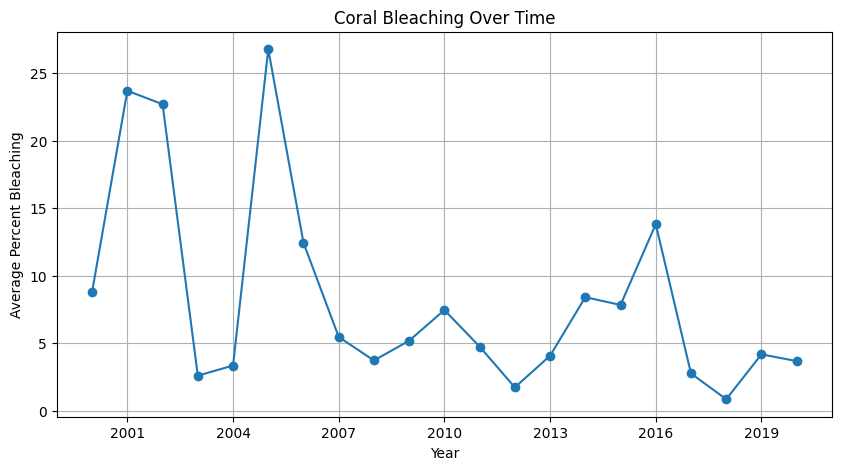

In [28]:
import matplotlib.ticker as mticker

bleaching_df['date_year'] = (
    pd.to_numeric(bleaching_df['date_year'], errors='coerce')
    .round(0)
    .astype('Int64')
)

# Keep only years > 2000
df = bleaching_df[bleaching_df['date_year'] >= 2000]

timeline = (
    df.groupby('date_year')['percent_bleaching']
      .mean()
      .sort_index()
)

plt.figure(figsize=(10, 5))
plt.plot(timeline.index, timeline.values, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Percent Bleaching')
plt.title('Coral Bleaching Over Time')
plt.grid(True)

# Force integer year labels
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show()


In [29]:

timeline = (
    df.groupby('date_year')['percent_bleaching']
      .median()  # Changed from mean() to median()
      .sort_index()
)

plt.figure(figsize=(10, 5))
plt.plot(timeline.index, timeline.values, marker='o')

plt.xlabel('Year')
plt.ylabel('Median Percent Bleaching')  # Updated label
plt.title('Coral Bleaching Over Time')
plt.grid(True)

# Force integer year labels
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show()

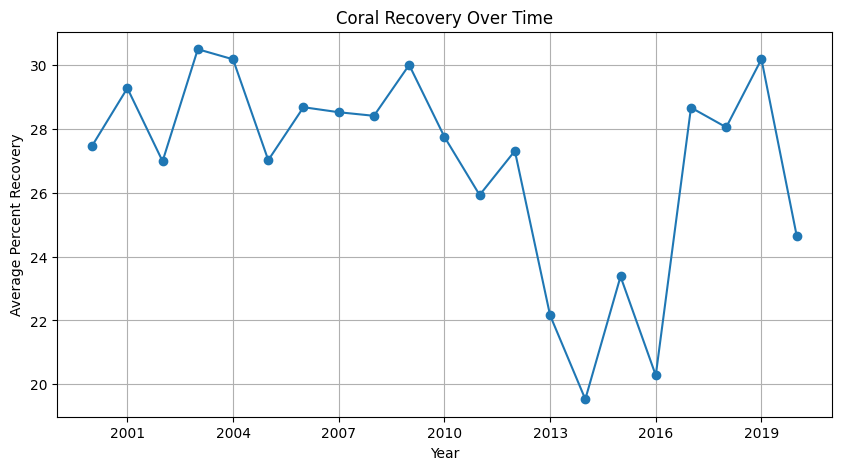

In [30]:
recovery_df['date_year'] = (
    pd.to_numeric(recovery_df['date_year'], errors='coerce')
    .round(0)
    .astype('Int64')
)

# Keep only years > 2000
df = recovery_df[recovery_df['date_year'] >= 2000]

timeline = (
    df.groupby('date_year')['percent_hard_coral_cover']
      .mean()
      .sort_index()
)

plt.figure(figsize=(10, 5))
plt.plot(timeline.index, timeline.values, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Percent Recovery')
plt.title('Coral Recovery Over Time')
plt.grid(True)

# Force integer year labels
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show()


In [31]:
timeline = (
    df.groupby('date_year')['percent_hard_coral_cover']
      .median()
      .sort_index()
)

plt.figure(figsize=(10, 5))
plt.plot(timeline.index, timeline.values, marker='o')

plt.xlabel('Year')
plt.ylabel('Median Percent Recovery')
plt.title('Coral Recovery Over Time')
plt.grid(True)

# Force integer year labels
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show()


In [32]:
!pip install streamlit -q
!pip install tornado==5.1


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=94730c30-48c9-4e25-8d76-bb0826cd7fbd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>